<a href="https://colab.research.google.com/github/rosanahjk/testPublico/blob/main/Desaf%C3%ADo_Final_1Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**DIPLOMATURA EN DATA SCIENCE PARA LA TOMA DE DECISIONES-Curso de Python**

**2024**

---Desafio final Python

Esta notebook tiene como objetivo realizar EDA . Exploraremos librerías, paquetes y funciones esenciales que facilitarán la manipulación y el procesamiento de datos, ayudándonos a comprender mejor cómo analizar y describir conjuntos de datos.
Recuerda realizar un análisis exploratorio de datos (EDA) utilizando Pandas. Debes manejar, limpiar, analizar y visualizar el conjunto de datos proporcionado, como en el desafio 2

Consignas:

* Elegir un problema de aprendizaje automático: puede ser un problema de regresión, clasificación o clustering. Justifica la elección.
Preprocesar los datos: Realizar cualquier limpieza y transformación necesaria en el conjunto de datos.
* Construir y entrenar el modelo: Implementa un algoritmo de aprendizaje automático adecuado para el problema (por ejemplo, regresión lineal, regresión logística, k-means, etc.).
* Evaluar el modelo: Utiliza métricas de evaluación apropiadas (precisión, recall, F1-score, curva ROC, AUC, etc.) para medir el rendimiento del modelo. Aplica validación cruzada si es necesario.
* Optimización de hiperparámetros: Si el modelo lo permite, utiliza GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros.
* Documentar y visualizar: Presenta los hallazgos mediante gráficos y visualizaciones que ayuden a entender el rendimiento del modelo y cualquier patrón interesante en los datos.


In [78]:
# Limpieza de datos, escalado y estandarización
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Visualización y uso de datos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Modelos de aprendizaje y selección de parámetros
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from scipy.stats import randint
import xgboost as xgb

# Métricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.linear_model import LogisticRegression



# Leer dataset Predicción de Diabetes -

El conjunto de datos de Kaggle para la predicción de diabetes contiene información médica y demográfica de pacientes, junto con su diagnóstico de diabetes (positivo o negativo). Incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre. Este dataset es útil para construir modelos de aprendizaje automático que predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes. Puede ayudar a los profesionales de la salud a identificar pacientes en riesgo y desarrollar tratamientos personalizados, así como a los investigadores a explorar las relaciones entre factores médicos y la probabilidad de desarrollar diabetes.
Acá un poco más del dataset [Predicción de diabetes](https://www.kaggle.com/code/octavioberruti/prediccion-de-diabetes-eda-random-forest-95)

In [94]:
# Cargar el conjunto de datos en un dataframe de Pandas
url = "https://github.com/yiranamejia/Prediccion-de-Diabetes/raw/main/diabetes_prediction_dataset%5B1%5D.csv"
df= pd.read_csv(url)


# Describe los atributos del dataset

# Un poco del dataset, exploracion y atributos

In [95]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [81]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [82]:
# obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df.columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'gender':
['Female' 'Male' 'Other']
Total de valores únicos: 3

En la columna 'age':
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Total de valores únicos: 102

En la columna 'hypertension':
[0 1]
Total de valores únicos: 2

En la columna 'heart_disease':
[1 0]
Total de valores únicos: 2

En la columna 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
Total de valores únicos: 6

En la col

In [83]:
# @title
# Revisión de valores nulos en df_unido con la función isnull().sum()
# La función isnull() identifica los valores nulos en el DataFrame,
# y la función sum() cuenta la cantidad de valores nulos por cada columna.
print("Valores nulos en df1_personas:")
print(df.isnull().sum())
print("\n")


#comentarios: Solo dos culumnas estan presentando valores nulos

Valores nulos en df1_personas:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64




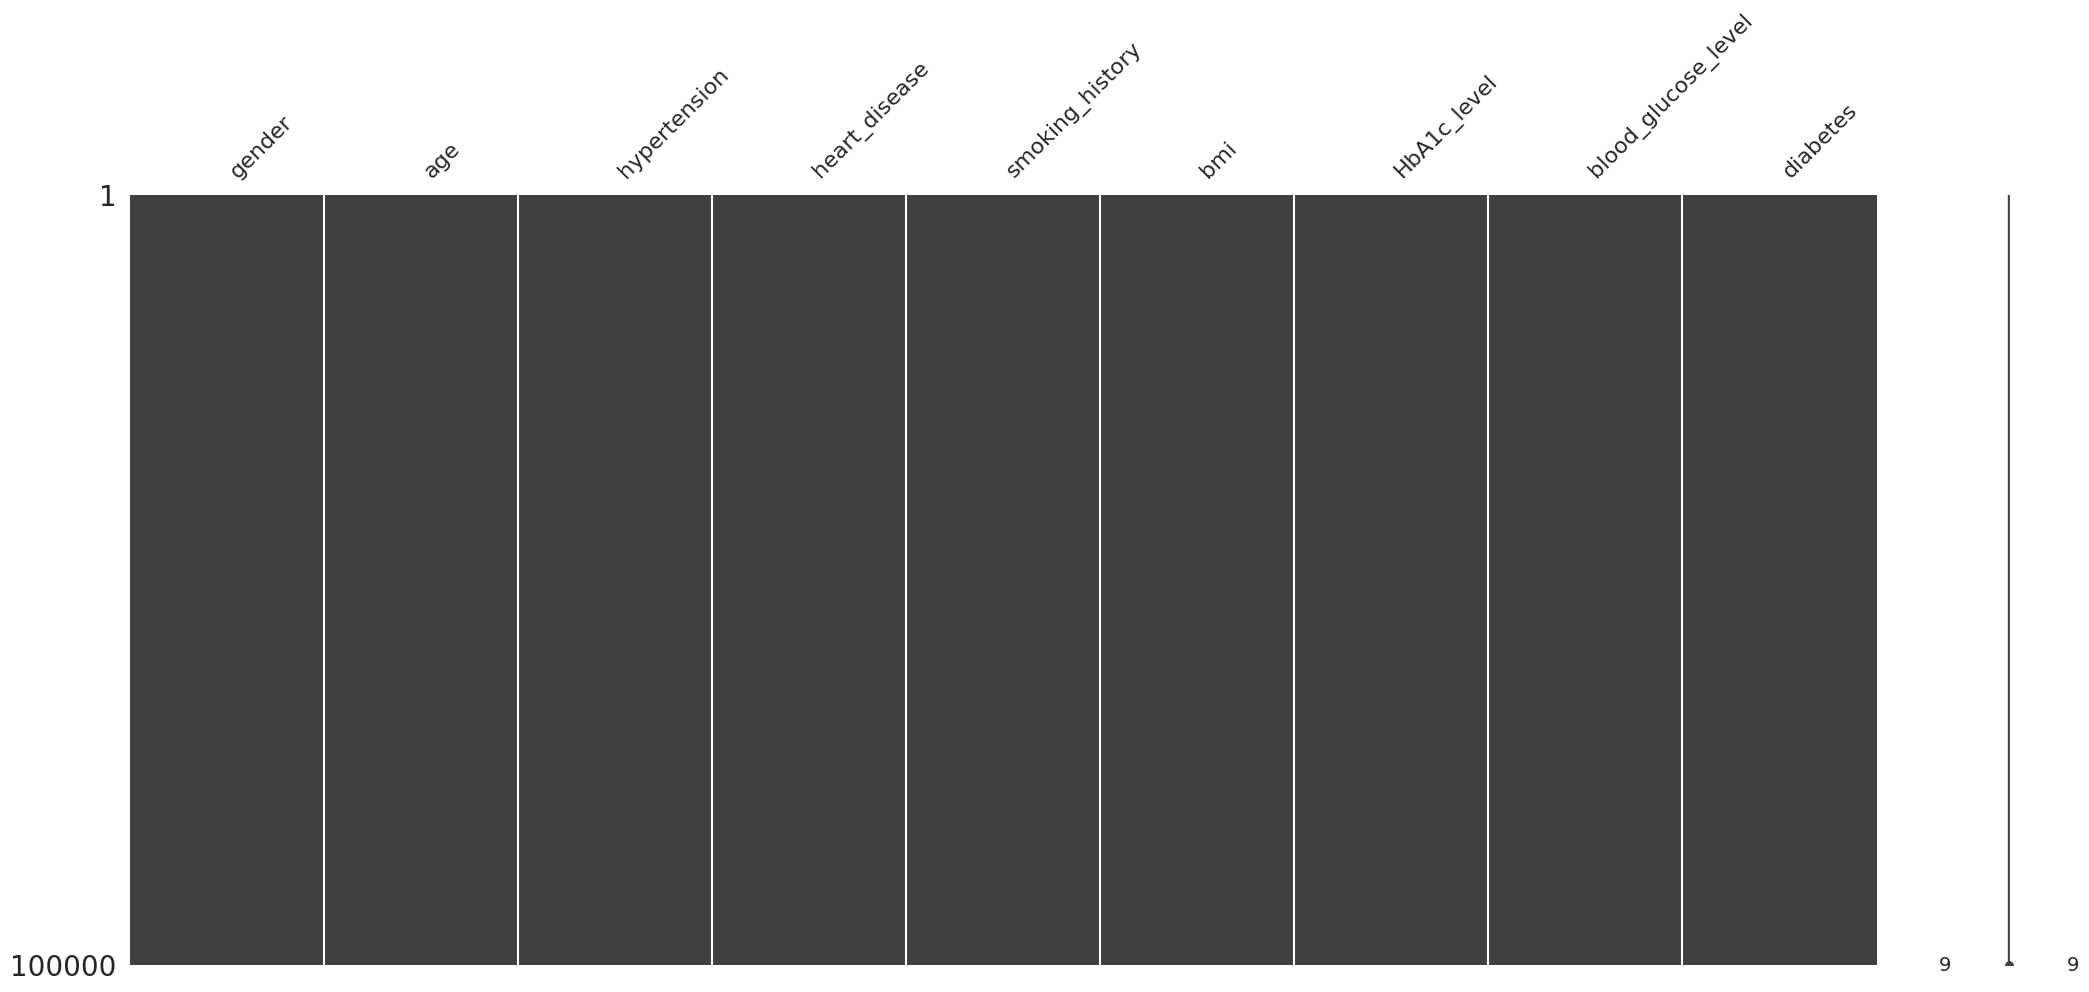

In [84]:
# visualizo que no hay datos faltantes
msno.matrix(df)
plt.show()

In [85]:
#Manejamos los valores duplicados
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

# Eliminar las filas duplicadas del DataFrame original
df = df.drop_duplicates()

# Verificar si se eliminaron
print("Tamaño del DataFrame después de eliminar duplicados:", df.shape)

number of duplicate rows:  (3854, 9)
Tamaño del DataFrame después de eliminar duplicados: (96146, 9)


In [96]:
#Removemos el valor extraño en la variable "gender"
df['gender'].unique()

df = df[df['gender'] != 'Other']

# Seleccionando atributos de interes
incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre.
predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes



# Histograma para Age y diabetes

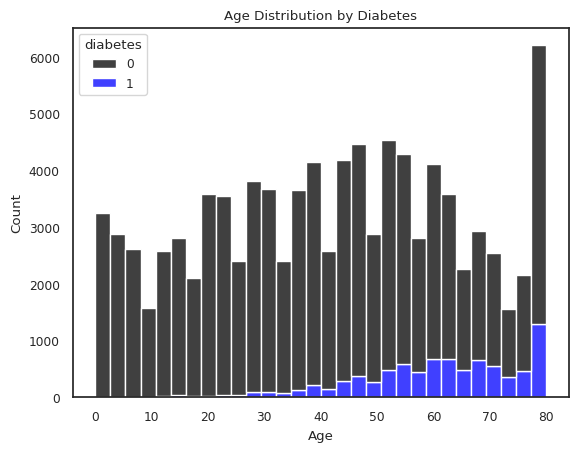

In [87]:
# Crear un histograma de la distribución de edad, separado por la variable 'diabetes'
palette_colors = {0: "black", 1: "blue"}

sns.histplot(data=df, x='age', bins=30, hue='diabetes', multiple='stack', palette=palette_colors)

# Añadir título y etiquetas a los ejes
plt.title('Age Distribution by Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

#Diagrama de barras para Gender

<ipython-input-88-8bed4ef93e0b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


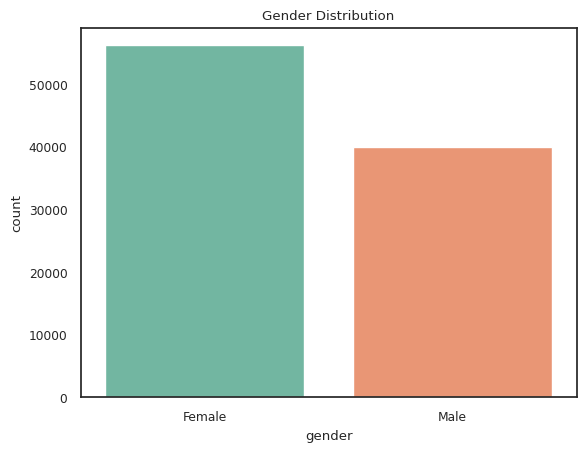

In [88]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Grafico de distribucion para BMI, vs diabetes

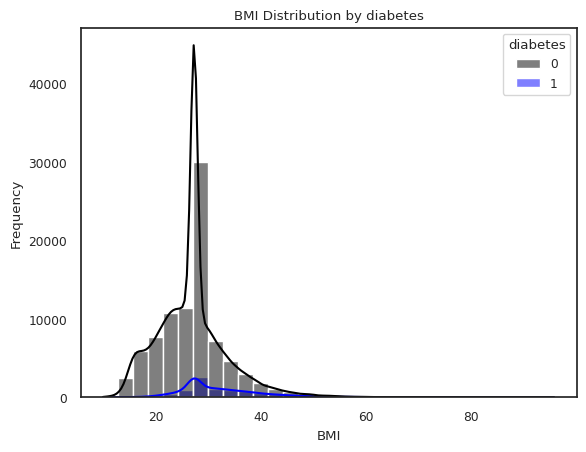

In [89]:
# Definir una paleta de colores personalizada
palette_colors = {0: "black", 1: "blue"}

# Usar histplot con una paleta de colores personalizada
sns.histplot(data=df, x='bmi', bins=30, kde=True, hue='diabetes', palette=palette_colors)
plt.title('BMI Distribution by diabetes')
plt.xlabel('BMI')  # Etiqueta para el eje X
plt.ylabel('Frequency')  # Etiqueta para el eje Y
plt.show()

# Graficos para variables binarias

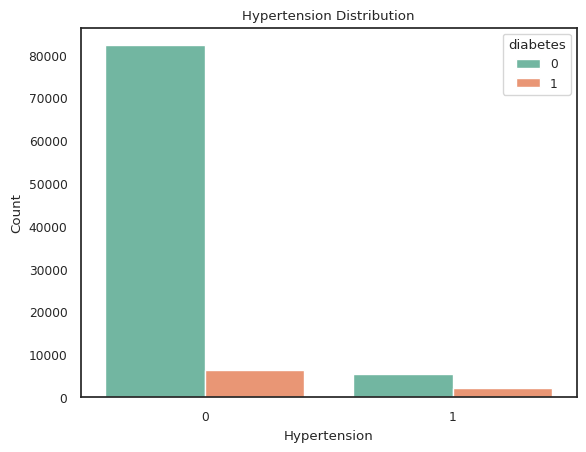

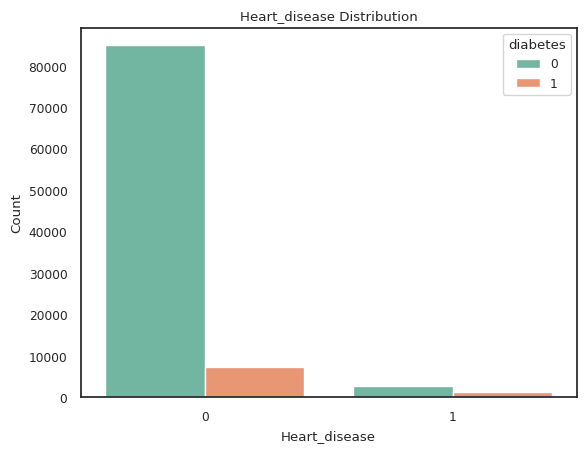

In [67]:
# Iterar sobre las columnas seleccionadas y crear gráficos de barras
for col in ['hypertension', 'heart_disease']:
    sns.countplot(x=col, data=df, hue='diabetes', palette='Set2')
    plt.title(f'{col.capitalize()} Distribution')  # Título con nombre de la variable
    plt.xlabel(col.capitalize())  # Etiqueta del eje X con la variable correspondiente
    plt.ylabel('Count')  # Etiqueta del eje Y
    plt.show()

# Grafico para smoking history

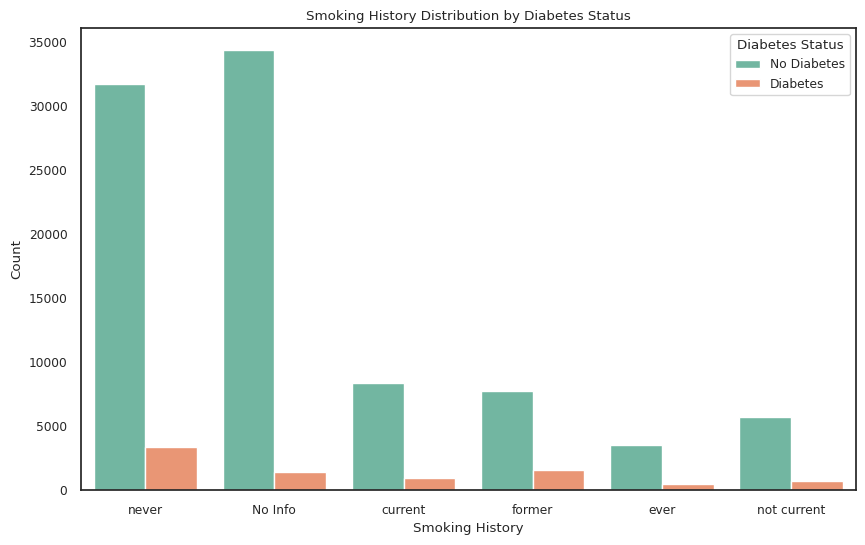

In [53]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='Set2')

# Configurar el título y mostrar el gráfico
plt.title('Smoking History Distribution by Diabetes Status')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()

 Relación entre Edad, diabetes y gender

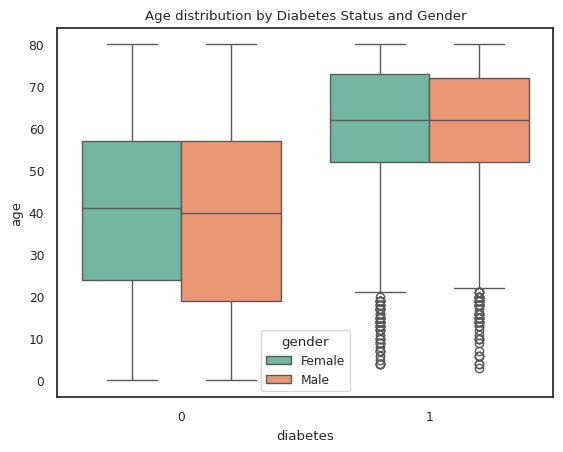

In [69]:
sns.boxplot(x='diabetes', y='age', hue='gender', palette='Set2', data=df)
plt.title('Age distribution by Diabetes Status and Gender')
plt.show()

# por el graficos se ve casos atípicos de jóvenes con diabetes,en ambos género

# hacer una copia


In [109]:
data = df.copy()

# ver el equilibrio de la variable dependiente


Porcentaje de cada clase:
diabetes
0    91.49847
1     8.50153
Name: proportion, dtype: float64


<ipython-input-99-83d082d239e9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


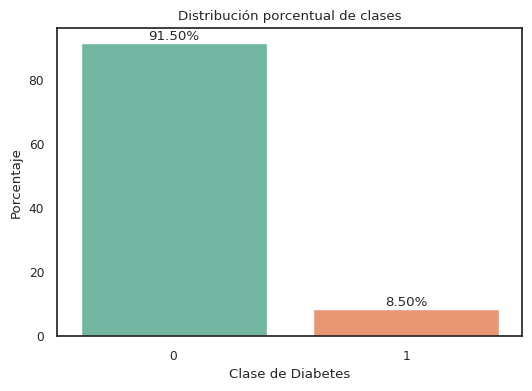

In [99]:
# Calcula el porcentaje de cada variable de la columna dependiente
class_counts = data['diabetes'].value_counts(normalize=True) * 100
print("Porcentaje de cada clase:")
print(class_counts)

#el conjunto de datos está desbalanceado
 # (con un 9% de casos positivos para la diabetes y un 91% de casos negativos)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Añadir etiquetas y título
plt.title('Distribución porcentual de clases')
plt.xlabel('Clase de Diabetes')
plt.ylabel('Porcentaje')

# Mostrar los valores porcentuales encima de las barras
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

# Mostrar el gráfico
plt.show()

# Escando las variables numéricas y las variables con encoding
Para Random Forest Clasificador no es estrictamente necesario pero si quiero comparar este resultado con otros modelos todos deben estar en las mismas condiciones como es escalado, pero para otros modelos como de regresión logistica, Support Vector Machines(SVM) si es necesario.

In [ ]:
#Separamos las variables en numericas y categoricas, para realizar encoding o ya ssea escalado o estandarizacion

In [137]:
# Identificar variables numéricas y categóricas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Variables Numéricas:")
print(numerical_cols)

print("\nVariables Categóricas:")
print(categorical_cols)

Variables Numéricas:
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Sexo', 'Trabaja'],
      dtype='object')

Variables Categóricas:
Index(['gender', 'smoking_history'], dtype='object')


In [138]:
# Crear DataFrames para variables numéricas y categóricas
df_numerical = data[numerical_cols]
df_categorical = data[categorical_cols]

In [139]:
# crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convertir el array resultante a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

# scaled

In [140]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convertir el array resultante a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

# Encoder

In [147]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
df_categorical_encoded = data[categorical_cols].apply(label_encoder.fit_transform)
print(df_categorical_encoded)

       gender  smoking_history
0           0                4
1           0                0
2           1                4
3           0                1
4           1                1
...       ...              ...
99995       0                0
99996       0                0
99997       1                3
99998       0                4
99999       0                1

[99982 rows x 2 columns]


Concatenamos La función pd.concat() en pandas se utiliza para concatenar (o combinar) dos o más DataFrames u objetos similares, como Series, en un solo DataFrame. Es muy útil cuando deseas unir diferentes partes de datos, ya sea a lo largo de filas o columnas.

In [148]:
# @title
#Concatenar las variables escaladas y codificadas
df_final = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

# Verificar el DataFrame final
print(df_final.head())

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.692577     -0.284467       4.935916 -0.321051     1.001692   
1  0.537899     -0.284467      -0.202597 -0.000114     1.001692   
2 -0.616779     -0.284467      -0.202597 -0.000114     0.161089   
3 -0.261494     -0.284467      -0.202597 -0.583225    -0.492714   
4  1.514935      3.515345       4.935916 -1.081957    -0.679515   

   blood_glucose_level  diabetes      Sexo   Trabaja  gender  smoking_history  
0             0.047709 -0.304819 -0.841175  0.963456     0.0              4.0  
1            -1.426157 -0.304819 -0.841175 -1.153451     0.0              0.0  
2             0.489869 -0.304819  1.188813  0.963456     1.0              4.0  
3             0.416175 -0.304819 -0.841175 -0.624224     0.0              1.0  
4             0.416175 -0.304819  1.188813 -0.624224     1.0              1.0  


#Matriz de Correlación

In [149]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

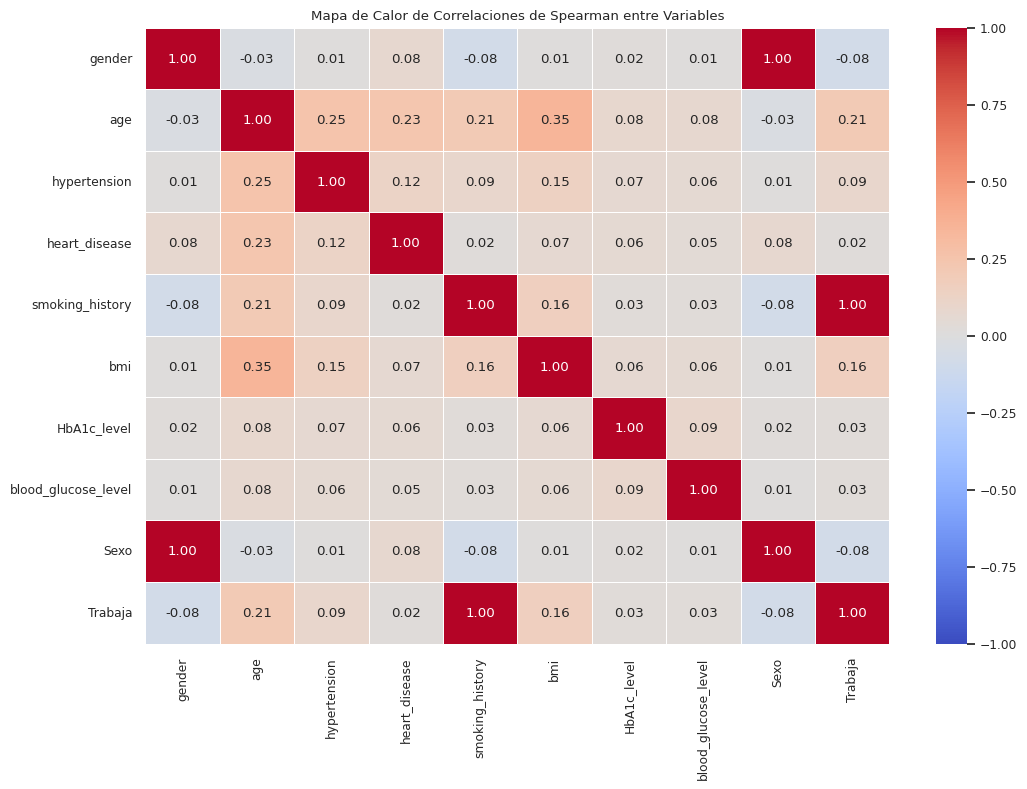

In [150]:
# Excluir la target 'diabetes' para el cálculo de la matriz de correlación
df_correlation = data.drop(columns=["diabetes"])

# Crear un LabelEncoder para codificar las variables categóricas
le = LabelEncoder()

# Codificar la columna 'gender' usando el LabelEncoder existente
df_correlation['gender'] = le.fit_transform(df_correlation['gender'])
df_correlation['smoking_history'] = le.fit_transform(df_correlation['smoking_history'])

# Calcular la matriz de correlación usando el coeficiente de Spearman
corr_matrix = df_correlation.corr(method='spearman')

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones de Spearman entre Variables')
plt.show()

# Análisis de Predicción

In [167]:
# ver las columnas
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'Sexo',
       'Trabaja'],
      dtype='object')

Dividimos el conjunto de datos en 80% y 20%

In [184]:
# Asegúrate de que tus datos están en un DataFrame
# data es tu DataFrame con las variables numéricas y categóricas mencionadas

# Convertir variables categóricas en dummies
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# Ver las columnas nuevas después de la codificación
print(data_encoded.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Sexo', 'Trabaja', 'gender_Male',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')


In [185]:
# Definir variables independientes (X) y la dependiente (y)
X = data_encoded.drop(columns=['diabetes'])  # 'diabetes' es la variable objetivo
y = data_encoded['diabetes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [189]:
# Definir la semilla para la reproducibilidad
seed = 42

# Sacamos la target que queremos predecir 'DIABETES'
X = df_final.drop(columns=['diabetes'])  # Variables de entrada
y = df_final['diabetes']  # Variable objetivo

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Crear el modelo de regresión logística
log_model = LogisticRegression()






In [190]:
imputer = SimpleImputer(strategy='mean') # Puedes usar 'median' o un valor numérico
X_train = imputer.fit_transform(X_train)



In [191]:
print(y_train.isnull().sum())  # Verifica la cantidad de valores NaN en y_train


15


In [192]:
# Eliminar filas con valores nulos en y_train y las correspondientes en X_train
X_train = X_train[y_train.notnull()]
y_train = y_train.dropna()




Entrenando los modelos

In [193]:
# @title
# Modelo 1: Random Forest
#random_model = RandomForestClassifier(random_state=seed)
##random_model.fit(X_train, y_train)
#rf_train_accuracy = random_model.score(X_train, y_train)
#rf_test_accuracy = random_model.score(X_test, y_test)
#print(f'Random Forest Train Accuracy: {rf_train_accuracy:.2f}')
#print(f'Random Forest Test Accuracy: {rf_test_accuracy:.2f}')

# Modelo 2: Regresión Logística
logist_model = LogisticRegression(random_state=seed, max_iter=1000)  # Añadido max_iter para evitar problemas de convergencia
logist_model.fit(X_train, y_train)
logist_train_accuracy = logist_model.score(X_train, y_train)
logist_test_accuracy = logist_model.score(X_test, y_test)
print(f'Logistic Regression Train Accuracy: {logist_train_accuracy:.2f}')
print(f'Logistic Regression Test Accuracy: {logist_test_accuracy:.2f}')

# Modelo 3: Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', random_state=seed)  # Cambia 'rbf' por el kernel que necesites
svc_model.fit(X_train, y_train)
svc_train_accuracy = svc_model.score(X_train, y_train)
svc_test_accuracy = svc_model.score(X_test, y_test)
print(f'SVC Train Accuracy: {svc_train_accuracy:.2f}')
print(f'SVC Test Accuracy: {svc_test_accuracy:.2f}')

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [168]:
# Definir variables independientes (X) y dependientes (y)
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'Sexo',
       'Trabaja']]
y = data['diabetes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características (opcional, pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

#  matriz de confusión para evaluar el rendimiento del modelo en las predicciones
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

#reporte de clasificación que proporciona métricas como precisión, recall y F1-score
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Male'

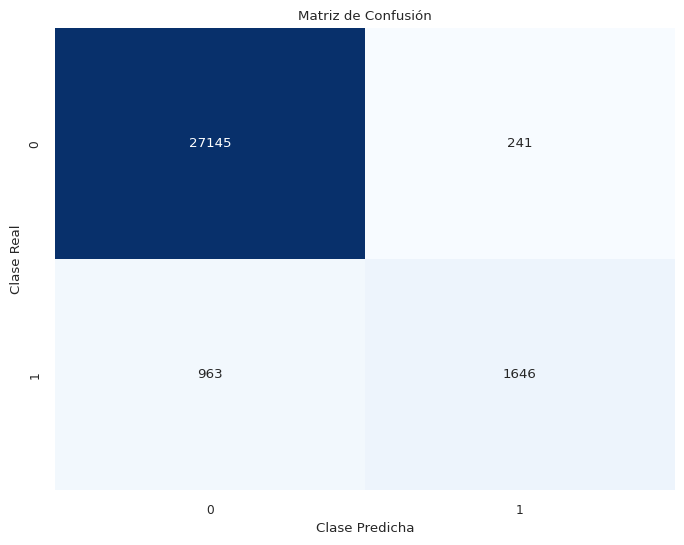

In [106]:
# Graficar la matriz de confusión usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

In [103]:
# Obtener los coeficientes de las variables
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
11                  HbA1c_level     2.501082
12          blood_glucose_level     1.344098
7                           age     1.025990
10                          bmi     0.580411
3         smoking_history_never     0.267669
0       smoking_history_current     0.210027
8                  hypertension     0.201048
2        smoking_history_former     0.177746
9                 heart_disease     0.133987
1          smoking_history_ever     0.126250
4   smoking_history_not current     0.121586
6                   gender_Male     0.070509
5                 gender_Female    -0.070509
